In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import seaborn as sns

2022-12-15 08:47:56.825671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 08:47:56.923453: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
metrics_df = pd.read_csv("metrics.csv")
q_metrics_df = pd.read_csv("qmetrics.csv")

In [4]:
q_metrics_df.columns

Index(['scan', 'offset_label', 'cho_std', 'on_cr_fwhm', 'off_cr_fwhm',
       'gaba_fwhm', 'on_cr_snr', 'off_cr_snr', 'gaba_snr', 'model_a',
       'model_b'],
      dtype='object')

Q = 0.5 +- 0.06 ; P = 52.8%
Q = 0.5 +- 0.05 ; P = 61.1%
Q = 0.53 +- 0.04 ; P = 72.2%
Q = 0.46 +- 0.13 ; P = 41.7%
-----
Q = 0.52 +- 0.06 ; P = 63.9%
Q = 0.51 +- 0.05 ; P = 58.3%
Q = 0.53 +- 0.07 ; P = 63.9%
Q = 0.43 +- 0.1 ; P = 25.0%
-----
Q = 0.52 +- 0.06 ; P = 63.9%
Q = 0.51 +- 0.05 ; P = 61.1%
Q = 0.51 +- 0.06 ; P = 61.1%
Q = 0.48 +- 0.11 ; P = 38.9%
-----


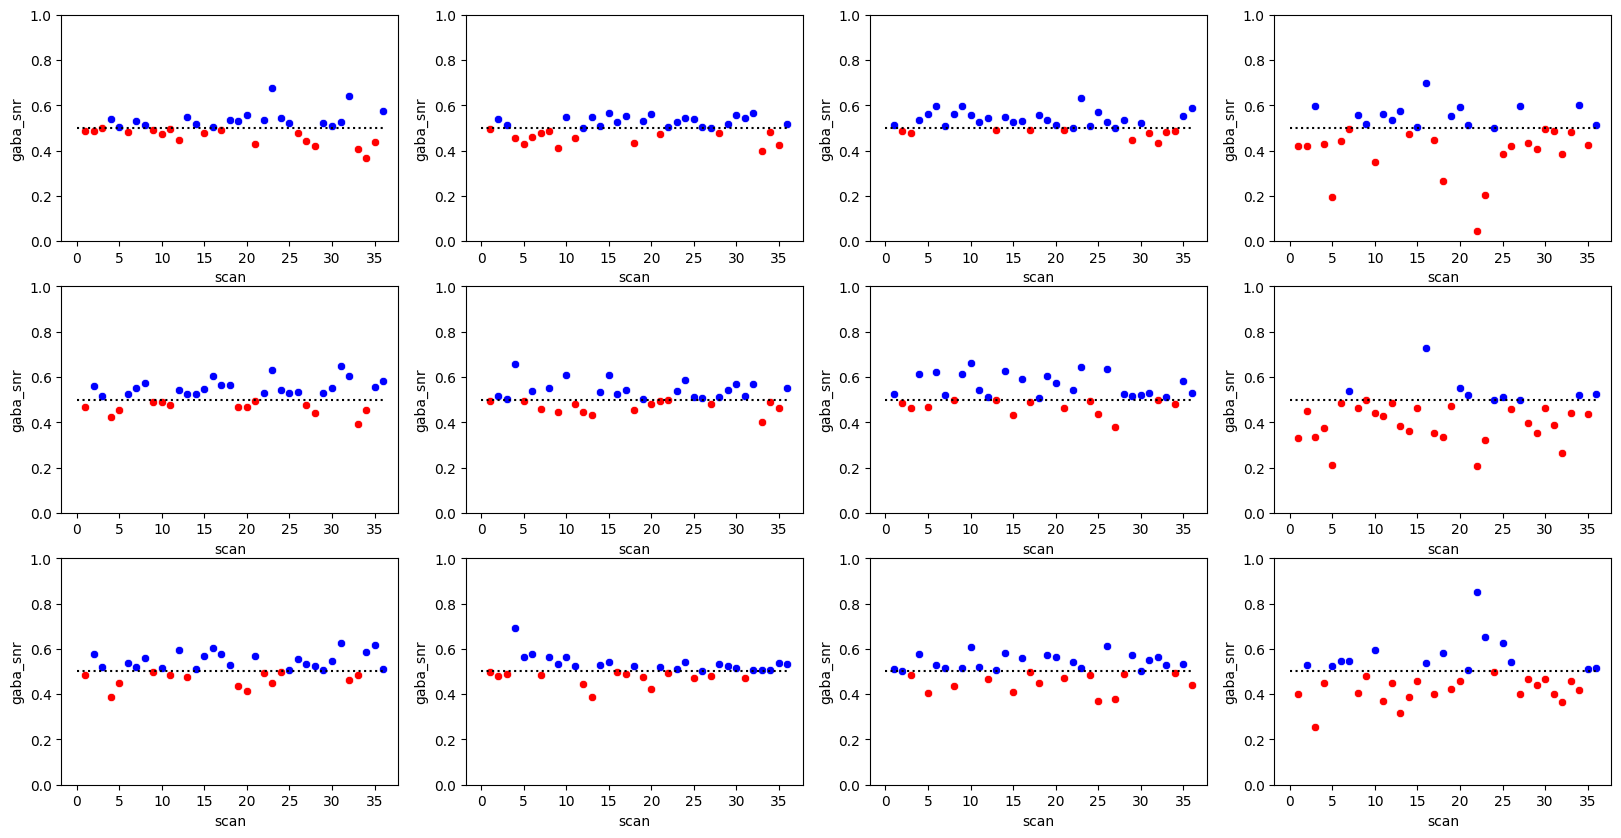

In [6]:
models = [("complex","control_ma"),("complex","control_tapper"),("control_ma","control_tapper")]

fig,ax = plt.subplots(3,4,figsize=(20,10))

##choose the metric to display
q_score_col = "gaba_snr"

for row in range(0,3):
    for col in range(0,4):
        i_df = q_metrics_df[(q_metrics_df["model_a"]==models[row][0])&(q_metrics_df["model_b"]==models[row][1])&(q_metrics_df["offset_label"]==col)].copy()
        i_df["color"] = i_df.apply(lambda x: "blue" if x[q_score_col]>0.5 else "red",axis=1)

        my_pallette = {q_score: "blue" if q_score >0.5 else "red" for q_score in i_df[q_score_col].unique()}
        sns.scatterplot(ax=ax[row,col],data = i_df[i_df["color"]=="blue"], x = "scan",y=q_score_col,color="blue")
        sns.scatterplot(ax=ax[row,col],data = i_df[i_df["color"]=="red"], x = "scan",y=q_score_col,color="red")
        ax[row,col].set_ylim(0,1)
        ax[row,col].hlines(0.5,0,36,color='k',linestyle=":")
        print(f"Q = {round(i_df[q_score_col].mean(),2)} +- {round(i_df[q_score_col].std(),2)} ; P = {round(100*i_df[i_df['color']=='blue'].shape[0]/i_df.shape[0],1)}%")
    print("-----")
plt.show()  

In [8]:
metrics_df.columns

Index(['scan', 'offset_label', 'model', 'cho_std', 'on_cr_fwhm', 'off_cr_fwhm',
       'gaba_fwhm', 'on_cr_snr', 'off_cr_snr', 'gaba_snr'],
      dtype='object')

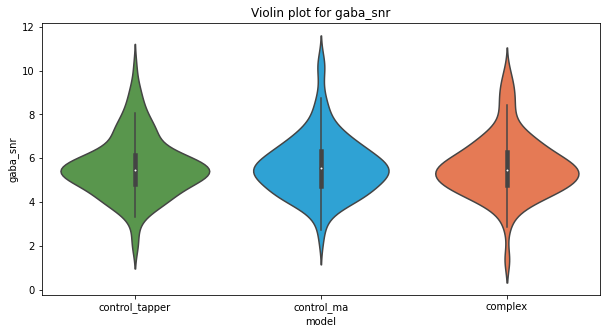

In [15]:
fig,ax = plt.subplots(figsize=(10,5))

metric = "gaba_snr"

models = ["control_tapper","control_ma","complex"]
model_labels = ["MLP","CNN","C_CNN"]
colors = ['seagreen','dodgerblue','coral']
markers = ['o','^','s']
title_texts=[""]
colour_palette = {"control_tapper": "#51A241", "control_ma": "#13ADF0", "complex": "#FD6E3D"}
order_dict={"control_tapper":1,"control_ma":2,"complex":3}

plot_df = metrics_df[metrics_df["model"].isin(order_dict.keys())].copy()
plot_df['order']=plot_df.apply(lambda x: order_dict[x['model']],axis=1)
plot_df = plot_df.sort_values("order")
sns.violinplot(data=plot_df, x='model', y=metric, palette=colour_palette).set(title=f"Violin plot for {metric}")
plt.show()